<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 6245 to 4750
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1299 non-null   float64
 1   1       1299 non-null   float64
 2   2       1299 non-null   float64
 3   3       1299 non-null   float64
 4   4       1299 non-null   float64
 5   5       1299 non-null   float64
 6   6       1299 non-null   float64
 7   7       1299 non-null   float64
 8   8       1299 non-null   float64
 9   9       1299 non-null   float64
 10  10      1299 non-null   float64
 11  11      1299 non-null   int64  
 12  12      1299 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 142.1 KB
None


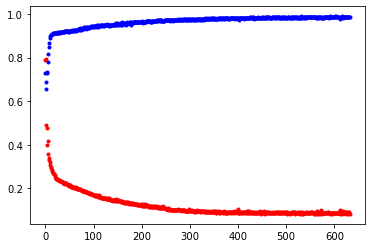

41/41 [==============================] - 0s 1ms/step - loss: 2.0817 - accuracy: 0.7247

 Accuracy: 0.7444


In [22]:
#Data : wine.csv 
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed=3
numpy.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv('./dataset/wine.csv',header=None)
df = df_pre.sample(frac=0.2) #20%
#print(df.head(5))
print(df.info())

dataset=df.values
X=dataset[:,0:12]
Y=dataset[:,12]

#X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=seed)

model = Sequential()
model.add(Dense(30, input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

#모델 저장하기
'''
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=100)


history = model.fit(X,Y,validation_split=0.3, epochs=2000,batch_size=200, verbose=0,callbacks=[early_stopping_callback,checkpointer])
'''

model_vloss=history.history['val_loss']
model_acc=history.history['accuracy']

x_len=numpy.arange(len(model_acc))
plt.plot(x_len,model_vloss,"o",c="red",markersize=3)
plt.plot(x_len,model_acc,"o",c="blue",markersize=3)
plt.show()


print("\n Accuracy: %.4f" %(model.evaluate(X,Y)[1]))
 